In [4]:
from sklearn import datasets, decomposition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


In [5]:
mbti_df = pd.read_csv('./processed_mbti.csv', header = 0)
mbti_df

,Type,Posts
0,INFJ,"['moment', 'sportscenter', 'top', 'ten', 'play..."
1,ENTP,"['finding', 'lack', 'these', 'post', 'very', '..."
2,INTP,"['good', 'one', 'course', 'which', 'say', 'kno..."
3,INTJ,"['dear', 'enjoyed', 'our', 'conversation', 'ot..."
4,ENTJ,"['fired', 'another', 'silly', 'misconception',..."
...,...,...
8670,ISFP,"['because', 'always', 'think', 'cat', 'fi', 'd..."
8671,ENFP,"['thread', 'already', 'exists', 'someplace', '..."
8672,INTP,"['many', 'question', 'when', 'these', 'thing',..."
8673,INFP,"['very', 'conflicted', 'right', 'now', 'when',..."


In [6]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(mbti_df['Posts'])
X

<8675x100271 sparse matrix of type '<class 'numpy.float64'>'
	with 3853947 stored elements in Compressed Sparse Row format>

In [7]:
X_array = X.toarray() 
pca = decomposition.PCA(n_components=100)
pca.fit(X_array)
X_pca = pca.transform(X_array)

In [8]:
pca.explained_variance_ratio_

array([0.00985034, 0.00718017, 0.00434903, 0.0039032 , 0.00354113,
       0.00309124, 0.00277375, 0.00239405, 0.00232837, 0.00216675,
       0.00201728, 0.0018676 , 0.00173102, 0.0016121 , 0.00157513,
       0.00151283, 0.00137525, 0.00136657, 0.00127688, 0.00125666,
       0.00124174, 0.00117432, 0.00115841, 0.00113643, 0.00111432,
       0.00106163, 0.00104604, 0.00101991, 0.00099176, 0.00098068,
       0.00095654, 0.0009376 , 0.00092505, 0.00092257, 0.00091713,
       0.00090269, 0.00088098, 0.00087032, 0.0008602 , 0.00084619,
       0.00083796, 0.00082333, 0.0008217 , 0.00080937, 0.00080469,
       0.00080219, 0.00079575, 0.00078509, 0.00077423, 0.00076892,
       0.00076093, 0.00075678, 0.00075513, 0.0007496 , 0.00074161,
       0.0007355 , 0.0007321 , 0.00072085, 0.00071514, 0.0007138 ,
       0.00071226, 0.00070815, 0.00070215, 0.00069184, 0.00068785,
       0.00068463, 0.00068332, 0.00067888, 0.00067718, 0.00066923,
       0.00066592, 0.00066171, 0.00065694, 0.00065147, 0.00064

In [9]:
A = [0.00985034, 0.00718017, 0.00434903, 0.0039032 , 0.00354113,
       0.00309124, 0.00277375, 0.00239405, 0.00232837, 0.00216675,
       0.00201728, 0.0018676 , 0.00173102, 0.0016121 , 0.00157512,
       0.00151283, 0.00137525, 0.00136657, 0.00127688, 0.00125666,
       0.00124173, 0.0011743 , 0.00115842, 0.00113644, 0.00111434,
       0.0010616 , 0.00104605, 0.00101991, 0.00099181, 0.00098077,
       0.00095653, 0.0009375 , 0.0009251 , 0.0009225 , 0.00091734,
       0.0009026 , 0.00088096, 0.00087021, 0.00086003, 0.00084633,
       0.00083799, 0.00082349, 0.00082126, 0.00081063, 0.00080472,
       0.0008019 , 0.00079554, 0.00078529, 0.00077302, 0.000769  ,
       0.00076067, 0.00075718, 0.00075426, 0.00074773, 0.00074025,
       0.00073538, 0.00072933, 0.00071931, 0.00071465, 0.0007111 ,
       0.00070758, 0.00070623, 0.00070048, 0.00069307, 0.00068893,
       0.00068373, 0.00067762, 0.00067727, 0.0006733 , 0.00066842,
       0.00066283, 0.00065883, 0.00065719, 0.00065262, 0.00064798,
       0.00064382, 0.00064274, 0.00064051, 0.00063551, 0.00062951,
       0.00062688, 0.0006226 , 0.00061592, 0.00061202, 0.00060974,
       0.00060875, 0.0006076 , 0.0006004 , 0.00059944, 0.00059442,
       0.00059243, 0.00058684, 0.00058392, 0.00058049, 0.00057917,
       0.0005724 , 0.00057148, 0.0005694 , 0.00056455, 0.00056124]
sum(A)

0.11771437000000007

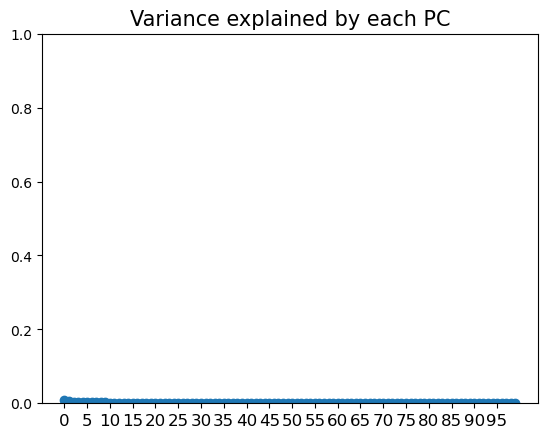

In [18]:
plt.plot(pca.explained_variance_ratio_,'o-')
plt.xticks( np.arange(0,100,5), fontsize=12)
plt.ylim(0,1)
plt.title('Variance explained by each PC', fontsize=15);

- My porject is using text data, and I vectorized all the text data using tfidf vectorizer. It does not really fit PCA.
- Based on all my trying results, when I set n_components = 50, the explained variance output did not even read 10%. Now when n_components = 100, the explained variance is only 11.8%.

In [11]:
from sklearn.cluster import KMeans

In [12]:
from sklearn.metrics import silhouette_score

/Users/zimoma/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zimoma/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zimoma/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zimoma/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zimoma/an

Text(0, 0.5, 'Score')

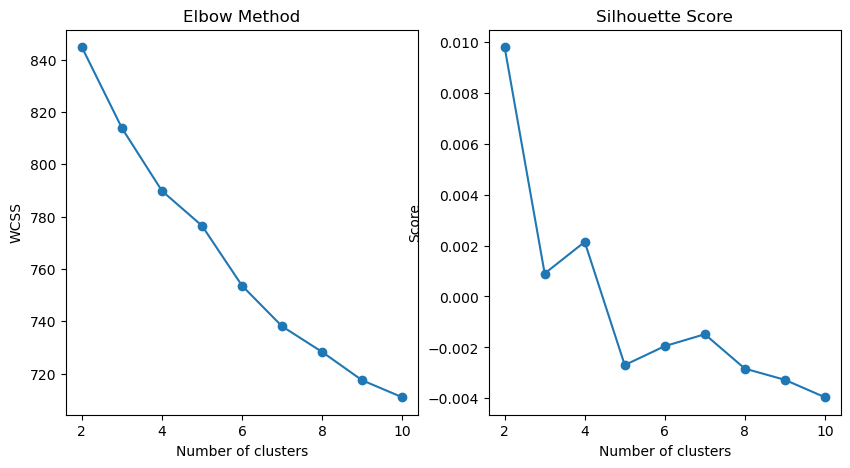

In [13]:
wcss = []
silhouette_scores = []

# Trying different numbers of clusters
for i in range(2, 11):  # Example: from 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)  # WCSS for the elbow method
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

- The Elbow Method plot shows a steady decrease in within-cluster sum of squares (WCSS) as the number of clusters increases instead of an apparent 'elbow' point. 
- The Silhouette score plot shows that 2 clusters are the best amount of clusters compared to other numbers of clusters. However, the score when 2 clusters is so small that is closed to 0, refering that 2 clusters might not be a strong support for a good clustering. 

Below: if applying 2-clusters

In [14]:
kmeans = KMeans(n_clusters = 2)
clusters_labels = kmeans.fit_predict(X_pca)

/Users/zimoma/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df_analysis = pd.DataFrame({'Cluster': clusters_labels, 'Label': mbti_df['Type']})

cluster_label_counts = df_analysis.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)
print(cluster_label_counts)

Label    ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  \
Cluster                                                                     
0         135   429   123   349    28    20    23    45   931  1112   521   
1          55   246   108   336    14    28    16    44   539   720   570   

Label    INTP  ISFJ  ISFP  ISTJ  ISTP  
Cluster                                
0         622   106   157   106   168  
1         682    60   114    99   169  


- No MBTI type is exclusively found in one cluster; each type is distributed across both clusters, which suggests that the clusters don't correspond to individual MBTI types very strongly.
- Most of personality types (like INFP, INFJ, ENFP, ENFJ) have a considerable number of instances in both clusters, but with a greater number in Cluster 1.
- Only a few types (ESFP, INTJ, INTP, ISTP) have more instances in Cluster 0 than Cluster 1.

In [16]:
# colors = np.array(["C0", "C1", "C2", 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9','C10','C11','C12','C13','C14','C15'])

def kmeans_visualize(X, k, max_iter=10, rand_seed=0):
    f,ax = plt.subplots(max_iter, figsize=(6.0, 4.6*max_iter))
    np.random.seed(rand_seed)
    
    # Randomly initialize k cluster centroids
    Mu = X[np.random.choice(X.shape[0],k),:] 
    
    # use for loop to repeat the following process until reach the limit
    for i in range(max_iter): 
        
        # assign each data to the closest cluster centroids
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        y = np.argmin(D,axis=1)
        
        # visualize the data with the color of its belonging cluster
        ax[i].scatter(X[:,0], X[:,1], c=colors[y])
        
        # visualize the current cluster centroid
        ax[i].scatter(Mu[:,0], Mu[:,1], c='k') 
        
        # Re-compute the cluster centroids
        Mu = np.array([np.mean(X[y==i],axis=0) for i in range(k)]) 
        
    # calculate the final loss/error
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2/X.shape[0]
    
    return Mu, y, loss

NameError: name 'colors' is not defined

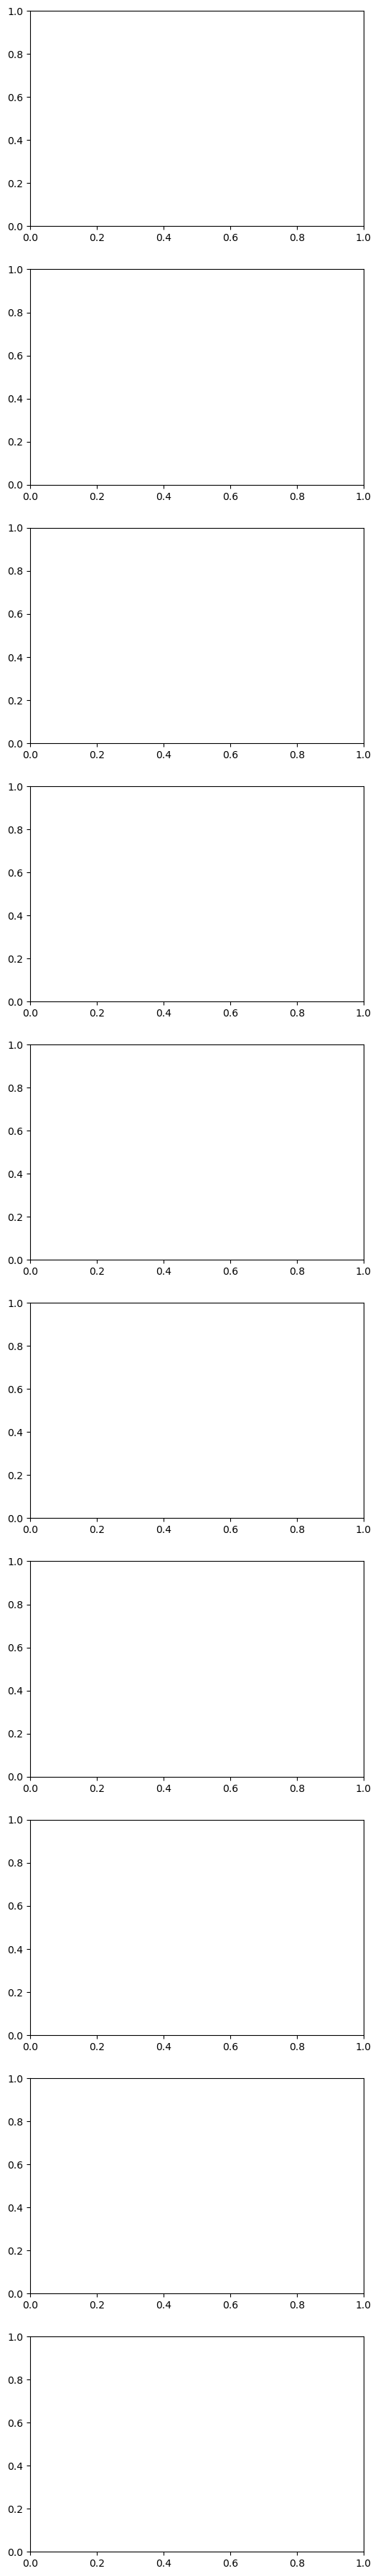

In [17]:
kmeans_visualize(X_pca, k=2, rand_seed = 1);

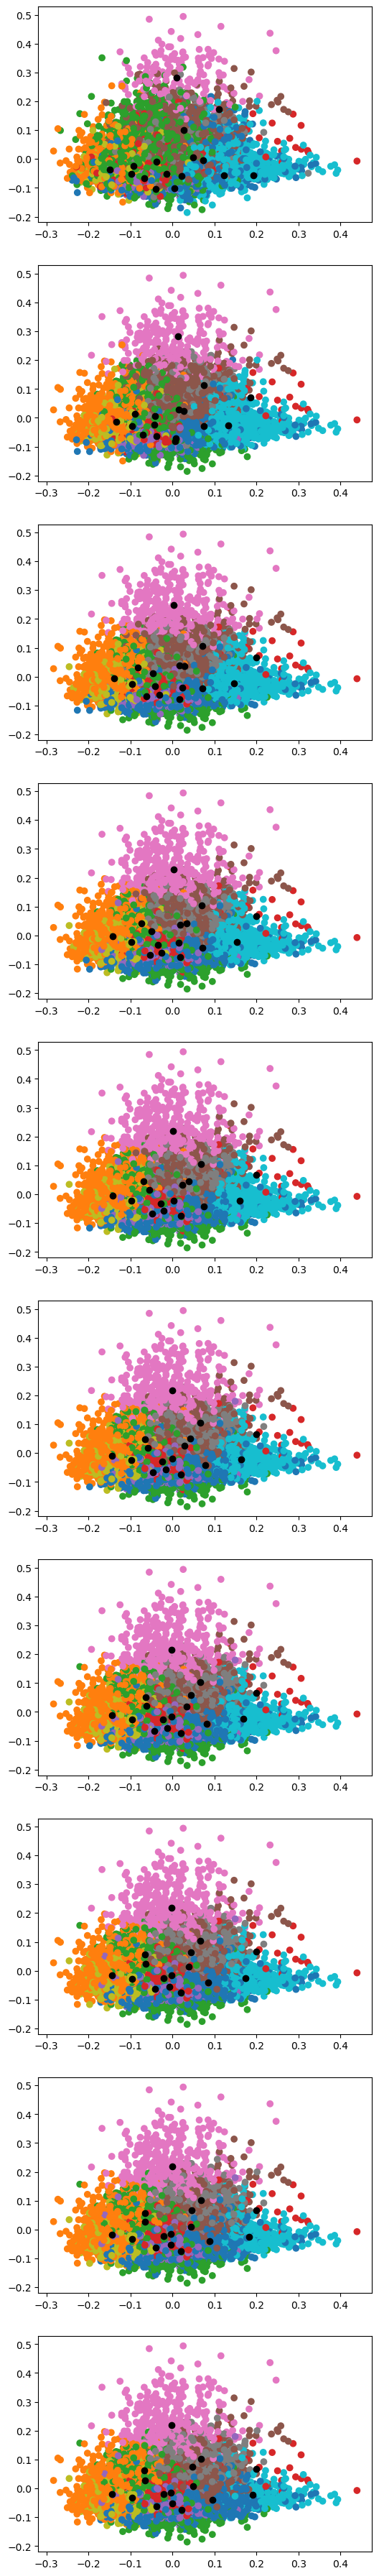

In [ ]:
kmeans_visualize(X_pca, k=16, rand_seed = 13);

From the two clustering I observed, when choosing the 2 clusters, there was an apparent color separation between two clusters, which corresponds to what I found earlier (2-cluster has the highest but still very small Silhouette Score). When setting k = 16, it did poor seperation. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


Now splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, mbti_df['Type'], test_size=0.3, random_state=42)

Random-forest model

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.3995389934690741

Interestingly the model performance increased from 0.323 to 0.395.
(Note: the PCA cannot explain most of variance) 
- The possible reason for increased performance for random forest model is random forest model can capture complex interactions between features. When PCA applied, it might remove some noises and prevent from overfitting in a certain level. 

In [ ]:
l1_clf = LogisticRegression( random_state=0, penalty='l1', solver='liblinear', C = 1.8)
l1_clf.fit(X_train, y_train)
l1_clf.score(X_test, y_test)

0.495197848636189

The model performance decreased from 0.52 to 0.495.
(Note: the PCA cannot explain most of variance) 
- The possible reason for decreased performance for logistic regression model is PCA might affect the capturing ability of the model on some vital information for prediction.